In [57]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [63]:
# pembuatan semesta

x_curah_hujan_rendah = np.arange(0, 700, 1)
# x_curah_hujan_sedang = np.arange(250, 469, 1)
# x_curah_hujan_tinggi = np.arange(360, 700, 1)

x_luas_lahan_kecil = np.arange(12000, 30000, 1)
# x_luas_lahan_sedang = np.arange(18164, 23766, 1)
# x_luas_lahan_besar = np.arange(20964, 30000, 1)

x_tingkat_permintaan = np.arange(3003550, 4200000)

x_produksi_bumbu_dapur = np.arange(2300, 2800000, 1)
# x_produksi_bumbu_dapur_sedang = np.arange(934867, 1867434, 1)
# x_produksi_bumbu_dapur_banyak = np.arange(1401150, 2800000, 1)

In [64]:
curah_hujan_rendah = fuzz.trapmf(x_curah_hujan_rendah, [0, 0, 31, 360])
curah_hujan_sedang = fuzz.trimf(x_curah_hujan_rendah, [250, 359.5, 469])
curah_hujan_tinggi = fuzz.trapmf(x_curah_hujan_rendah, [360, 689, 700, 700])

luas_lahan_kecil = fuzz.trapmf(x_luas_lahan_kecil, [0, 0, 12500, 20964])
luas_lahan_sedang = fuzz.trimf(x_luas_lahan_kecil, [18163, 20964.5, 23766])
luas_lahan_besar = fuzz.trapmf(x_luas_lahan_kecil, [20964, 29368, 30000, 30000])

tingkat_permintaan_rendah = fuzz.trapmf(x_tingkat_permintaan, [0, 0, 3003550, 4200000])
tingkat_permintaan_tinggi = fuzz.trapmf(x_tingkat_permintaan, [3003550, 4200000, 4200000, 4200000])

produksi_bumbu_dapur_sedikit = fuzz.trapmf(x_produksi_bumbu_dapur, [0, 0, 2300, 1401150])
produksi_bumbu_dapur_sedang = fuzz.trimf(x_produksi_bumbu_dapur, [934867, 1401150.5, 1867434])
produksi_bumbu_dapur_banyak = fuzz.trapmf(x_produksi_bumbu_dapur, [1401150, 2800000, 2800000, 2800000])

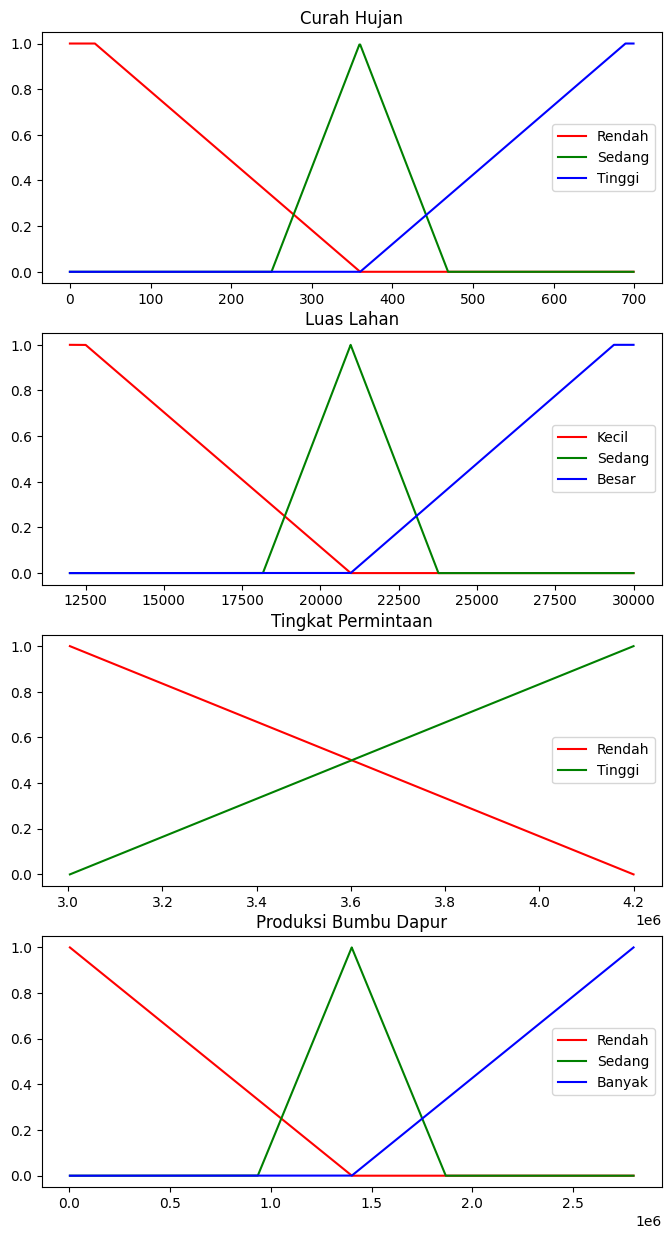

In [65]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,15))
ax0.plot(x_curah_hujan_rendah, curah_hujan_rendah, 'r', linewidth=1.5, label='Rendah')
ax0.plot(x_curah_hujan_rendah, curah_hujan_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_curah_hujan_rendah, curah_hujan_tinggi, 'b', linewidth=1.5, label='Tinggi')
ax0.set_title('Curah Hujan')
ax0.legend()

ax1.plot(x_luas_lahan_kecil, luas_lahan_kecil, 'r', linewidth=1.5, label='Kecil')
ax1.plot(x_luas_lahan_kecil, luas_lahan_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_luas_lahan_kecil, luas_lahan_besar, 'b', linewidth=1.5, label='Besar')
ax1.set_title('Luas Lahan')
ax1.legend()

ax2.plot(x_tingkat_permintaan, tingkat_permintaan_rendah, 'r', linewidth=1.5, label='Rendah')
ax2.plot(x_tingkat_permintaan, tingkat_permintaan_tinggi, 'g', linewidth=1.5, label='Tinggi')
ax2.set_title('Tingkat Permintaan')
ax2.legend()

ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedikit, 'r', linewidth=1.5, label='Rendah')
ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_sedang, 'g', linewidth=1.5, label='Sedang')
ax3.plot(x_produksi_bumbu_dapur, produksi_bumbu_dapur_banyak, 'b', linewidth=1.5, label='Banyak')
ax3.set_title('Produksi Bumbu Dapur')
ax3.legend()

In [61]:
# fuzzification

curah_hujan_level_rendah = fuzz.interp_membership(x_curah_hujan_rendah, curah_hujan_rendah, 200)
curah_hujan_level_sedang = fuzz.interp_membership(x_curah_hujan_rendah, curah_hujan_sedang, 200)
curah_hujan_level_tinggi = fuzz.interp_membership(x_curah_hujan_rendah, curah_hujan_tinggi, 200)

luas_lahan_level_kecil = fuzz.interp_membership(x_luas_lahan_kecil, luas_lahan_kecil, 15000)
luas_lahan_level_sedang = fuzz.interp_membership(x_luas_lahan_kecil, luas_lahan_sedang, 15000)
luas_lahan_level_besar = fuzz.interp_membership(x_luas_lahan_kecil, luas_lahan_besar, 15000)

tingkat_permintaan_level_rendah = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_rendah, 3800000)
tingkat_permintaan_level_tinggi = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_tinggi, 3800000)


print(curah_hujan_level_rendah, curah_hujan_level_sedang, curah_hujan_level_tinggi)
print(luas_lahan_level_kecil, luas_lahan_level_sedang, luas_lahan_level_besar)
print(tingkat_permintaan_level_rendah, tingkat_permintaan_level_tinggi)

0.48632218844984804 0.0 0.0
0.7046313799621928 0.0 0.0
0.33432237034560575 0.6656776296543943


In [62]:
# sedikit
active_rule1 = min(curah_hujan_level_rendah, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# sedang
active_rule2 = min(curah_hujan_level_rendah, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedikit 
active_rule3 = min(curah_hujan_level_rendah, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule4 = min(curah_hujan_level_rendah, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedikit
active_rule5 = min(curah_hujan_level_rendah, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# sedang
active_rule6 = min(curah_hujan_level_rendah, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)
# sedikit
active_rule7 = min(curah_hujan_level_sedang, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# banyak
active_rule8 = min(curah_hujan_level_sedang, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedang
active_rule9 = min(curah_hujan_level_sedang, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule10 = min(curah_hujan_level_sedang, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedang
active_rule11 = min(curah_hujan_level_sedang, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# banyak
active_rule12 = min(curah_hujan_level_sedang, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)
# sedikit
active_rule13 = min(curah_hujan_level_tinggi, luas_lahan_level_kecil, tingkat_permintaan_level_rendah)
# sedang
active_rule14 = min(curah_hujan_level_tinggi, luas_lahan_level_kecil, tingkat_permintaan_level_tinggi)
# sedang
active_rule15 = min(curah_hujan_level_tinggi, luas_lahan_level_sedang, tingkat_permintaan_level_rendah)
# banyak
active_rule16 = min(curah_hujan_level_tinggi, luas_lahan_level_sedang, tingkat_permintaan_level_tinggi)
# sedikit
active_rule17 = min(curah_hujan_level_tinggi, luas_lahan_level_besar, tingkat_permintaan_level_rendah)
# banyak
active_rule18 = min(curah_hujan_level_tinggi, luas_lahan_level_besar, tingkat_permintaan_level_tinggi)

print(active_rule1, active_rule2, active_rule3, active_rule4, active_rule5, active_rule6, active_rule7, active_rule8, active_rule9, active_rule10, active_rule11, active_rule12, active_rule13, active_rule14, active_rule15, active_rule16, active_rule17, active_rule18)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
produksi_activation_r1 = np.fmin(active_rule1, produksi_bumbu_dapur_sedikit)
produksi_activation_r2 = np.fmin(active_rule2, produksi_bumbu_dapur_sedang)
produksi_activation_r3 = np.fmin(active_rule3, produksi_bumbu_dapur_sedikit)
produksi_activation_r4 = np.fmin(active_rule4, produksi_bumbu_dapur_banyak)
produksi_activation_r5 = np.fmin(active_rule5, produksi_bumbu_dapur_sedikit)
produksi_activation_r6 = np.fmin(active_rule6, produksi_bumbu_dapur_sedang)
produksi_activation_r7 = np.fmin(active_rule7, produksi_bumbu_dapur_sedikit)
produksi_activation_r8 = np.fmin(active_rule8, produksi_bumbu_dapur_banyak)
produksi_activation_r9 = np.fmin(active_rule9, produksi_bumbu_dapur_sedang)
produksi_activation_r10 = np.fmin(active_rule10, produksi_bumbu_dapur_banyak)
produksi_activation_r11 = np.fmin(active_rule11, produksi_bumbu_dapur_sedang)
produksi_activation_r12 = np.fmin(active_rule12, produksi_bumbu_dapur_banyak)
produksi_activation_r13 = np.fmin(active_rule13, produksi_bumbu_dapur_sedikit)
produksi_activation_r14 = np.fmin(active_rule14, produksi_bumbu_dapur_sedang)
produksi_activation_r15 = np.fmin(active_rule15, produksi_bumbu_dapur_sedang)
produksi_activation_r16 = np.fmin(active_rule16, produksi_bumbu_dapur_banyak)
produksi_activation_r17 = np.fmin(active_rule17, produksi_bumbu_dapur_sedikit)
produksi_activation_r18 = np.fmin(active_rule18, produksi_bumbu_dapur_banyak)



produksi0 = np.zeros_like(x_produksi_bumbu_dapur)


0.33432237034560575 0.48632218844984804 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
